In [8]:
data = [[5.815828,5.388362,5.210277,4.733245,4.398642,3.305985,2.850597,2.687289,1.4176035],
[11.86344,11.009735,10.413972,8.743901,8.090308,7.617688,5.458585,5.237469,3.179911],
[10.703931,10.496108,10.324977,10.19883,9.388243,10.154065,7.640832,7.943013,4.953376],
[7.29143,7.014467,6.456687,6.998598,5.789738,5.552884,5.023758,4.126489,3.004196],
[26.87156,24.88276,24.91779,21.80082,25.1135,22.55491,20.90201,15.544673,14.606878],
[93.71294,89.15727,88.50763,88.57968,77.42696,80.24582,73.34879,57.03088,53.83085]]
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(data, sigma=2)

import pandas as pd
dat = pd.DataFrame(ysmoothed, index=['yeast', 'human','cora','citeseer','pubmed','wordnet'], columns=['10','20','30','40','50','60','70','80','90']).T


In [27]:
dat

,yeast,human,cora,citeseer,pubmed,wordnet
10,5.389077,10.851948,10.462481,6.946560,25.320041,90.116515
20,5.240363,10.494012,10.367273,6.833305,24.971281,89.044882
30,4.955838,9.844373,10.175060,6.613589,24.370032,86.959020
40,4.556430,9.000209,9.872766,6.292462,23.587311,83.906092
50,4.071473,8.048563,9.433279,5.873605,22.575229,79.895853
60,3.544497,7.057227,8.839048,5.374031,21.245182,75.020309
70,3.036433,6.107615,8.134790,4.844082,19.668669,69.725142
80,2.624182,5.329159,7.467317,4.379150,18.185097,65.004762
90,2.389536,4.881903,7.051360,4.101462,17.272059,62.168245


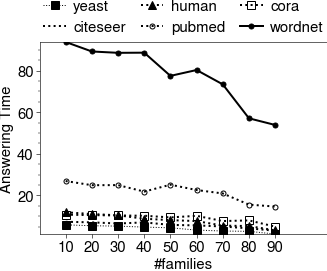

In [4]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=15
plot.rc.large=24

f, axs = plot.subplots(
    nrows=1, ncols=1, aspect=1.5, axwidth=4,
    share=1, wratios=(1)
)
axs.format(
   xlim=(-1,10),xgrid=False, ygrid=False, ylabel='Answering Time',xlabel='#families'
)

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])

ax = axs[0]
obj = ax.plot(dat, cycle=cycle,legend='t', labels=columns, legend_kw={'frameon':False, 'ncols':3})
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='ul')


# f.legend(obj, columns)
plt.savefig("case1_time.eps")
plt.show()

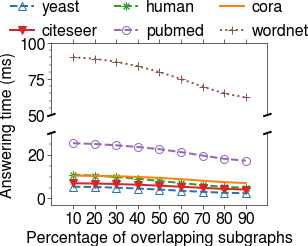

In [9]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=16
plot.rc.large=24

f, axs = plot.subplots(
    nrows=2, ncols=1, aspect=3, axwidth=3, axheight=1,
    share=1, wratios=(1), hspace=0.25
)
axs.format(
    xlim=(-1,9), ylim=(-1,-0.55), xgrid=False, ygrid=False, ylabel='Answering time (ms)',xlabel='Percentage of overlapping subgraphs'
)

ax = axs[0]
ax2 = axs[1]

ax.set_ylim(50, 100)  # outliers only
ax2.set_ylim(-3,30)  # most of the data

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

# cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])
# cycle = plot.Cycle(['b','g','k','r','m','k'], marker=["^",(8,2,0),"","v","o","+"], 
#                    markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
#                    linewidth=[2,2,2,2,2,2], 
#                    fillstyle=['none','full','full','full','none','full'])

import matplotlib.colors as mcolors

tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])

ax = axs[0]
obj = ax.plot(dat, cycle=cycle, legend='', labels=columns, legend_kw={'frameon':False, 'ncols':3,'fontsize':'18'})
# obj = ax.plot(dat.iloc[[1,4,7,10,13,16,19]], cycle=cycle)
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='r')

ax2.plot(dat, cycle=cycle)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False,marker="",linestyle="-",linewidth=2)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.legend(obj, ncols=3, center=False, frame=False, loc='t', order='C',space='0.22em')
plt.savefig("case1_time.eps")
plt.show()

In [10]:
data1 = [[1.6698725,1.571231,2.379548,3.136248,3.226992,4.693128,5.138278,6.529128,6.169206,7.742735],
[2.860529,4.311197,3.825184,4.495167,6.094431,9.504426,12.16096,13.17477,15.39926,16.2431],
[3.0658534,6.703369,9.022874,9.666152,8.117405,9.769786,10.176307,9.529709,10.004998,10.701531],
[3.4320162,4.234896,6.061428,5.327436,6.130362,6.284221,6.235878,6.556105,7.106874,7.624853],
[11.911184,16.559786,16.940847,18.76926,18.16784,18.51881,21.74805,21.3581,22.99261,24.06355],
[60.35689,65.00848,71.56669,75.02796,73.59816,78.68442,80.83705,82.9077,87.16344,88.24634]]
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed1 = gaussian_filter1d(data1, sigma=2)

import pandas as pd
dat1 = pd.DataFrame(ysmoothed1, index=['yeast', 'human','cora','citeseer','pubmed','wordnet'], columns=['10','20','30','40','50','60','70','80','90','100']).T


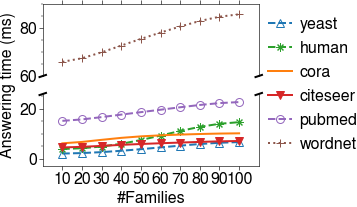

In [11]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=16
plot.rc.large=24

f, axs = plot.subplots(
    nrows=2, ncols=1, aspect=3, axwidth=3, axheight=1,
    share=1, wratios=(1), hspace=0.25
)
axs.format(
    xlim=(-1,10), ylim=(-1,-0.55), xgrid=False, ygrid=False, ylabel='Answering time (ms)',xlabel='#Families'
)

ax = axs[0]
ax2 = axs[1]

ax.set_ylim(60, 90)  # outliers only
ax2.set_ylim(-3, 26)  # most of the data

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

# cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])
# cycle = plot.Cycle(['b','g','k','r','m','k'], marker=["^",(8,2,0),"","v","o","+"], 
#                    markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
#                    linewidth=[2,2,2,2,2,2], 
#                    fillstyle=['none','full','full','full','none','full'])

import matplotlib.colors as mcolors

tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])

ax = axs[0]
obj = ax.plot(dat1, cycle=cycle, legend='', labels=columns, legend_kw={'frameon':False, 'ncols':3,'fontsize':'18'})
# obj = ax.plot(dat.iloc[[1,4,7,10,13,16,19]], cycle=cycle)
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
# ax.format(ylabel='Correlation')
# ax6.set_title('Wordnet')
# ax6.legend(loc='r')

ax2.plot(dat1, cycle=cycle)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False,marker="",linestyle="-",linewidth=2)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

f.legend(obj, ncols=1, center=False, frame=False, loc='r', order='C',space='0.55em')
plt.savefig("rep_time.eps")
plt.show()

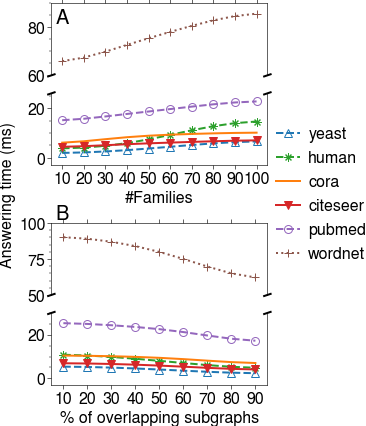

In [95]:
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
# plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
plot.rc.small=16
plot.rc.large=20

f, axs = plot.subplots(
    nrows=4, ncols=1, aspect=3, axwidth=3, axheight=1,
    sharey=1,sharex=0, wratios=(1), hspace=[0.25,0.8,0.25]
)
axs.format(
    xlim=(-0.5,9.5), ylim=(-1,-0.55), xgrid=False, ygrid=False, ylabel='Answering time (ms)'
    #bottomlabels=["", "Effects of query repetition", "","Effects of query overlapping"]
    #,abc=True, abcloc='l'
)

# 
ax = axs[0]
ax2 = axs[1]
ai = axs[2]
ai2 = axs[3]

ax.set_ylim(60, 90)  # outliers only
ax2.set_ylim(-3, 26)  # most of the data

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']

# cycle = plot.Cycle(['k','k','k','k','k','k'], marker=["s","^","s","",".","."], markersize=[8,8,8,10,10,10], linestyle=[":",":",":",":",":","-"], linewidth=[1,2,2,2,2,2,], fillstyle=['full','full','none','full','none','full'])
# cycle = plot.Cycle(['b','g','k','r','m','k'], marker=["^",(8,2,0),"","v","o","+"], 
#                    markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
#                    linewidth=[2,2,2,2,2,2], 
#                    fillstyle=['none','full','full','full','none','full'])

import matplotlib.colors as mcolors

tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])

ax = axs[0]
obj = ax.plot(dat1, cycle=cycle, legend='', labels=columns, legend_kw={'frameon':False, 'ncols':3,'fontsize':'18'})
# obj = ax.plot(dat.iloc[[1,4,7,10,13,16,19]], cycle=cycle)
# obj = ax6.plot(dat, cycle=cycle,legend='ul', legend_kw={'frameon':False, 'ncols':1})
ax2.format(xlabel='#Families')
# ax6.set_title('Wordnet')
# ax6.legend(loc='r')

ax2.plot(dat1, cycle=cycle)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis



d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False,marker="",linestyle="-",linewidth=2)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal




ai.set_ylim(50, 100)  # outliers only
ai2.set_ylim(-3,30)  # most of the data

cycle = 'default'
columns=['yeast', 'human','cora','citeseer','pubmed','wordnet']


import matplotlib.colors as mcolors

tab_color = mcolors.TABLEAU_COLORS
tab_colors = [tab_color['tab:blue'],tab_color['tab:green'], tab_color['tab:orange'],tab_color['tab:red'],tab_color['tab:purple'],tab_color['tab:brown']]
cycle = plot.Cycle(tab_colors, marker=["^",(8,2,0),"","v","o","+"], 
                   markersize=[8,8,8,8,8,8], linestyle=["--","--","-","-","--",":"], 
                   linewidth=[2,2,2,2,2,2], 
                   fillstyle=['none','full','full','full','none','full'])

obj = ai.plot(dat, cycle=cycle, legend='', labels=columns, legend_kw={'frameon':False, 'ncols':3,'fontsize':'18'})


ai2.plot(dat, cycle=cycle)

ai.spines['bottom'].set_visible(False)
ai2.spines['top'].set_visible(False)
ai.xaxis.tick_top()
ai.tick_params(labeltop=False)  # don't put tick labels at the top
ai2.xaxis

ai.format(xlim=(-0.5,8.5))
ai2.format(xlim=(-0.5,8.5), xlabel="% of overlapping subgraphs")


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ai.transAxes, color='k', clip_on=False,marker="",linestyle="-",linewidth=2)
ai.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ai.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ai2.transAxes)  # switch to the bottom axes
ai2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ai2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ai.text(0.05, .8, 'A', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)
# ax2.text(1, 1, 'B', fontsize=20)
ax2.text(0.02, -2., 'B',  transform=ax.transAxes, fontsize=20)


f.legend(obj, ncols=1, center=False, frame=False, loc='r', order='C',space='0.55em')

plt.savefig("workload.eps")
plt.show()